# Módulo 2 do Trabalho Prático

Neste trabalho, a DCT (direta e inversa) deve ser desenvolvida utilizando as equações estudadas em sala de aula, sem o uso de bibliotecas prontas para este fim. 

1 Dado um sinal de áudio s com N amostras, desenvolva uma aplicação para:

 a) Exibir a DCT de s e o valor do nível DC;

b) Encontrar uma aproximação ? de s obtida preservando os n (parâmetro inteiro no intervalo [0, N-1]) coeficientes AC (da DCT) mais importantes de s e zerando os demais coeficientes AC. Para audição, o sinal resultante deve ser multiplicado por uma constante c tal que (volume de ?) = (volume de s)

2 Dada uma imagem I de dimensões RxC, desenvolva uma aplicação para:

a) Exibir a DCT de s, sem o nível DC, e o valor do nível DC;

b) Encontrar e exibir uma aproximação de I obtida preservando os n coeficientes AC (da DCT) mais importantes de I e zerando os demais. O parâmetro n é um inteiro no intervalo [0, RxC-1].

3 Desenvolva um compactador/expansor de frequências para sinais de áudio, em que Xt[round(k*c)] = X[k], c real, c > 0. A dimensão do vetor Xt deve ser igual à do vetor X.


In [240]:
#%matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.io.wavfile
from scipy import fftpack
import pydub
from pydub.playback import play
import math

In [88]:
def dct1D(vector):
    N = len(vector)
    X = np.zeros(N)
    Ak = math.sqrt(2.0/N)
    for k in range(N):
        print(k + 1, " | ", N ," " * 10, end="\r")
        
        if k == 0:
            Ck = math.sqrt(1/2)
        else:
            Ck = 1
            
        somatorio = 0
        for n in range(N):
            
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            twoN = 2.0 * N
            
            
            somatorio += vector[n] * math.cos((q/twoN) + (w/twoN))
            
            #sum += vector[n] * math.cos(((2*math.pi*k*n)/2*N)+((k*math.pi)/2*N))
        X[k] = Ak * Ck * somatorio

    return X

In [89]:
# CalculaIDCT

In [90]:
def idct1D(X):

    N = len(X)
    x = np.zeros(N)

    Ak = math.sqrt(2.0/N)
    
    for n in range(N):
        print(n + 1 , " | ", N, " " * 10, end="\r")
        somatorio = 0
        for k in range(N):
            
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            twoN = 2.0 * N
            
            
            if k == 0:
                Ck = math.sqrt(1.0/2.0)
            else:
                Ck = 1.0
            
            somatorio += Ck * X[k] * math.cos((q/twoN)+(w/twoN))
            
            
        x[n] = Ak * somatorio

    return x

# Questão 3

In [91]:
def Compactador(X,c):
    K = len(X)
    for i in range(K):
        #Se a posição nao existir 
        if(round(i*c) >= K): # multiplica pela constante c
            X[i] = 0.0;
        else:
            X[i] = X[round(i*c)];
            
    return X

# Função para plotagem do gráfico com a DCT Filtrada

In [129]:
def plotaDCTs(dct, dctFiltrada):

    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(DCT, linewidth=0.1, alpha=1.0, color='blue')
  
    ax2.plot(dctCompactado, linewidth=0.1, alpha=1.0, color='blue')
    plt.show()

In [413]:
def desenhaGrafico(nomeArquivo, data):
    plt.figure(nomeArquivo, figsize=(20,6))
    plt.title(nomeArquivo)
    plt.plot(data, linewidth=0.1, alpha=1, color='red')
    plt.ylabel('Amplitude')
    plt.xlabel('Dados')
    plt.show()

# Testes com DCT e IDCT

In [414]:
x_slide = []

X_slide = [10, 5, 8.5, 2, 1, 1.5, 0, 0.1]

x_slide = idct1D(X_slide)
x_slide_pack = fftpack.idct(X_slide, norm='ortho')

In [415]:
print("M: ", x_slide)
print("C: ", x_slide_pack)
print(x_slide == x_slide_pack)

M:  [11.52544031  5.92860134  2.15160745  0.4693178  -0.54411923  0.9595444
  3.68816887  4.10571031]
C:  [11.52544031  5.92860134  2.15160745  0.4693178  -0.54411923  0.9595444
  3.68816887  4.10571031]
[False False False False  True False False False]


In [416]:
X_DCT = dct1D(x_slide)
X_DCT

array([ 1.00000000e+01,  5.00000000e+00,  8.50000000e+00,  2.00000000e+00,
        1.00000000e+00,  1.50000000e+00, -1.44328993e-15,  1.00000000e-01])

In [417]:
X_DCT_pack = fftpack.dct(x_slide, norm="ortho")
X_DCT_pack

array([ 1.00000000e+01,  5.00000000e+00,  8.50000000e+00,  2.00000000e+00,
        1.00000000e+00,  1.50000000e+00, -1.77635684e-15,  1.00000000e-01])

In [418]:
X_DCT == X_DCT_pack

array([False, False,  True, False, False, False, False, False])

# DCTAudio

/home/lucasnn/.local/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


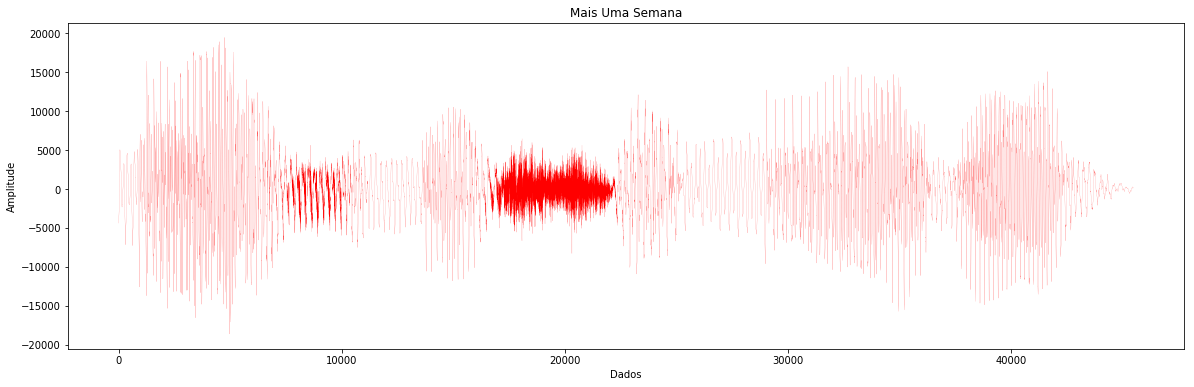

In [419]:
rate, audioData = scipy.io.wavfile.read("MaisUmaSemana.wav")
desenhaGrafico("Mais Uma Semana", audioData)

In [420]:
len(audioData)

45498

In [421]:
prompt = "Digite o tamanho de dados a ser tratado: MAX=" + str(len(audioData)) + " :" 
length = int(input(prompt))
if(length > len(audioData)):
    print("Valor entrado é maior")
    length = len(audioData)
print(length)

Digite o tamanho de dados a ser tratado: MAX=45498 :123123123
Valor entrado é maior
45498


In [422]:
len(audioData)
len(audioData[:length])

45498

In [423]:
#DCT = dct1D(audioData[:length])

DCT = fftpack.dct(audioData, norm = 'ortho') #Calcula a Transformada Discreta

In [424]:
#print (DCT)
dctFiltrada = DCT.copy()
# print (dctFiltrada)

In [425]:
listaComDCT = dctFiltrada.tolist() #Cria uma lista com os valores resultantes da Transformada Discreta
#print(listaComDCT)
Indices = []

#Percorre todo o array e troca os valores pelo seu módulo
for i in range(0, len(listaComDCT)):
    listaComDCT[i] = abs(listaComDCT[i])
    aux = listaComDCT.copy()

#print(listaComDCT)

In [426]:
numero_de_frequencias_desejadas = int(input("Digite o numero de frequencias desejadas: "))

Digite o numero de frequencias desejadas: 100000


In [427]:
#Adiciona na lista os n índices de maior valor, com n = numero de amostras
for i in range(0,numero_de_frequencias_desejadas):
    Indices.append(listaComDCT.index(max(aux)))
    indiceAux = aux.index(max(aux))
    aux.pop(indiceAux)

    # dctFiltrada = DCT.copy()

print(Indices)

ValueError: max() arg is an empty sequence

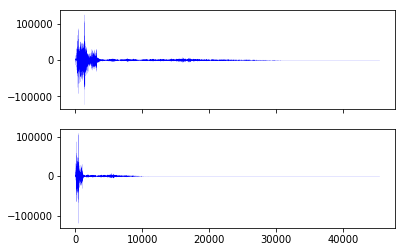

In [428]:
#Preserva os DCT's de tamanho igual aos da lista de IndiceMaximo verificando se eles estão na lista e zera os demais
for i in range(0, len(dctFiltrada)):
    if i not in Indices:
        dctFiltrada[i] = 0

dctFiltrada = np.asarray(dctFiltrada)

AudioTransformado = fftpack.idct(DCT, norm = 'ortho')
#AudioTransformado = idct1D(DCT)
AudioTransformado = AudioTransformado.astype("int16")
scipy.io.wavfile.write("audioTransformado.wav", rate, AudioTransformado)

AudioTransformadoImportantes = fftpack.idct(dctFiltrada, norm = 'ortho')
#AudioTransformadoImportantes = idct1D(dctFiltrada)
AudioTransformadoImportantes = AudioTransformadoImportantes.astype("int16")
scipy.io.wavfile.write("AudioTransformadoImportantes.wav", rate, AudioTransformadoImportantes)

plotaDCTs(DCT, dctFiltrada)

In [429]:
len(DCT)

45498

In [430]:
dctCompactado = Compactador(DCT, 3)

AudioTransformadoCompactado = fftpack.idct(dctCompactado, norm = 'ortho')
#AudioTransformadoImportantes = idct1D(dctFiltrada)
AudioTransformadoCompactado = AudioTransformadoCompactado.astype("int16")
scipy.io.wavfile.write("AudioTransformadoCompactado.wav", rate, AudioTransformadoCompactado)

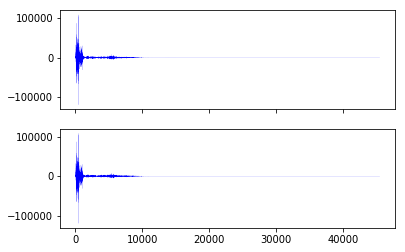

In [431]:
plotaDCTs(DCT, dctCompactado)

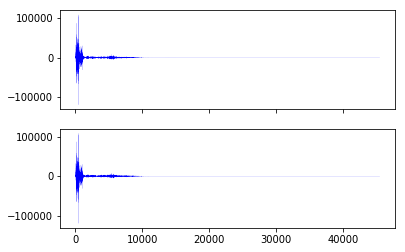

In [432]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(DCT, linewidth=0.1, alpha=1.0, color='blue')
  
ax2.plot(dctCompactado, linewidth=0.1, alpha=1.0, color='blue')
plt.show()

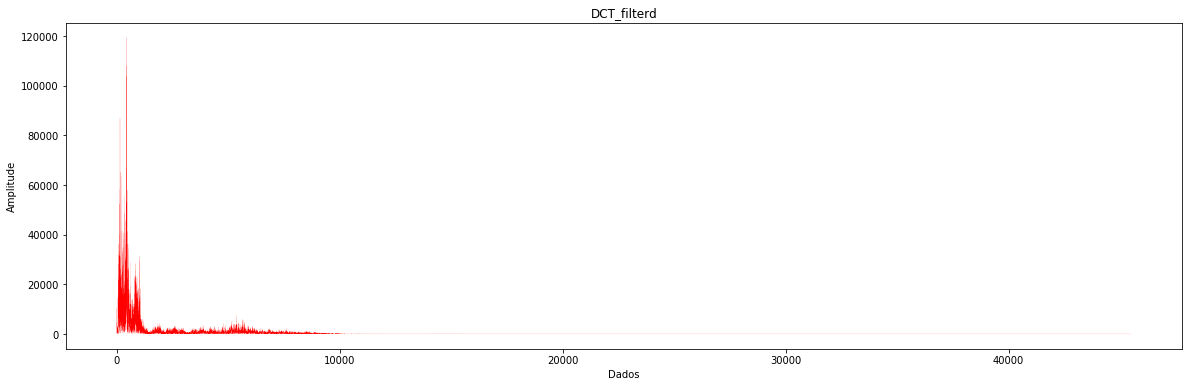

In [433]:
DCT_filtered = DCT.copy()


# Valores modulados
for i in range(len(DCT)):
    DCT_filtered[i] = abs(DCT[i])

# plot_audio_wave(DCT)
DCT_abs = DCT_filtered.copy()
desenhaGrafico("DCT_filterd", DCT_filtered)

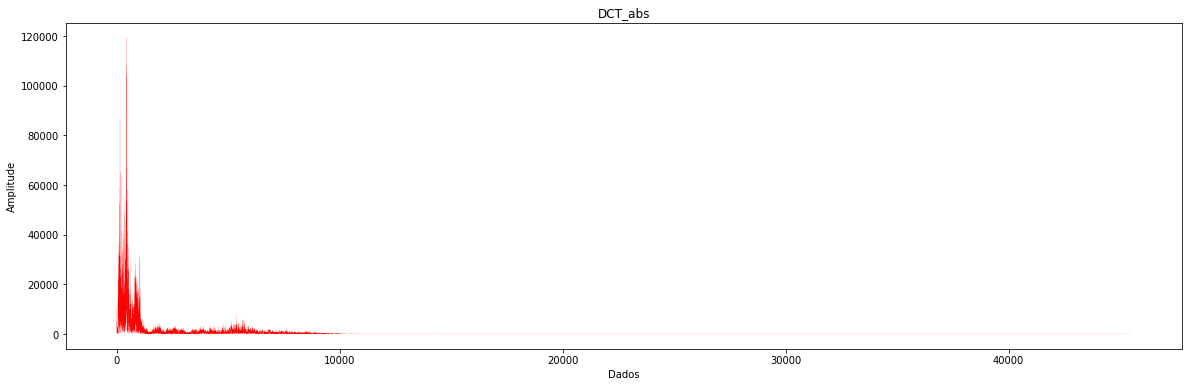

In [434]:
desenhaGrafico("DCT_abs", DCT_abs)

# Questão 2

2 Dada uma imagem I de dimensões RxC, desenvolva uma aplicação para:

a) Exibir a DCT de s, sem o nível DC, e o valor do nível DC;

b) Encontrar e exibir uma aproximação de I obtida preservando os n coeficientes AC (da DCT) mais importantes de I e zerando os demais. O parâmetro n é um inteiro no intervalo [0, RxC-1].

In [3]:
imagem = Image.open("lena.bmp")
imagem = np.asarray(imagem)
print (imagem)

[[137 135 133 ... 145 147 114]
 [137 137 133 ... 144 148 114]
 [138 133 134 ... 133 125  87]
 ...
 [ 28  29  28 ...  53  61  59]
 [ 20  24  25 ...  64  70  65]
 [ 21  30  25 ...  71  67  72]]


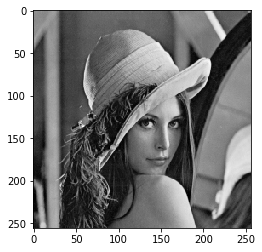

In [4]:
plt.imshow(imagem, cmap="gray")
plt.show()

## Implementando a DCT 2d

![Gráfico do processo de conversão](https://users.cs.cf.ac.uk/Dave.Marshall/Multimedia/Topic5.fig_117.gif)

Computing the 2D DCT

Factoring reduces problem to a series of 1D DCTs (Fig 7.11):

apply 1D DCT (Vertically) to Columns

apply 1D DCT (Horizontally) to resultant Vertical DCT above.

or alternatively Horizontal to Vertical. 

The equations are given by: 

In [5]:
imagem.shape

(256, 256)

In [6]:
# Criando A imagem no dominio da frequencia
ImagemDCT = np.zeros(imagem.shape)

In [9]:
ImagemDCT.shape

(256, 256)

In [10]:
ImagemDCT

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
# Aplicando DCT Verticalmente nas linhas
for i, linha in enumerate(imagem):
    #print(i)
    #ImagemDCT[i] = dct1D(linha)
    ImagemDCT[i] = fftpack.dct(linha)

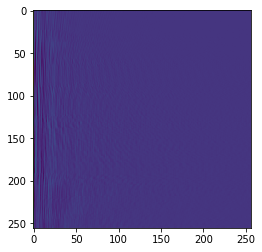

In [12]:
plt.imshow(ImagemDCT)

In [452]:
ImagemDCT_Trans = ImagemDCT.T

In [453]:
# Aplicando DCT Verticalmente nas Colunas
for i, linha in enumerate(ImagemDCT_Trans):
    #print(i)
    #ImagemDCT_Trans[i] = dct1D(linha)
    ImagemDCT_Trans[i] = fftpack.dct(linha)

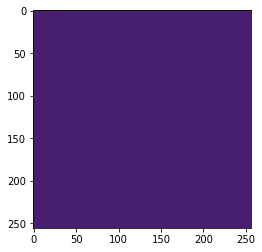

In [454]:
plt.imshow(ImagemDCT_Trans.T)

In [455]:
ImagemDCT_Trans.T[0][0]

25867396.0

In [456]:
a = ImagemDCT_Trans.T

In [457]:
a[0][0]

25867396.0

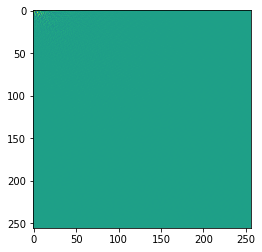

In [458]:
a[0][0] = 0
plt.imshow(a)

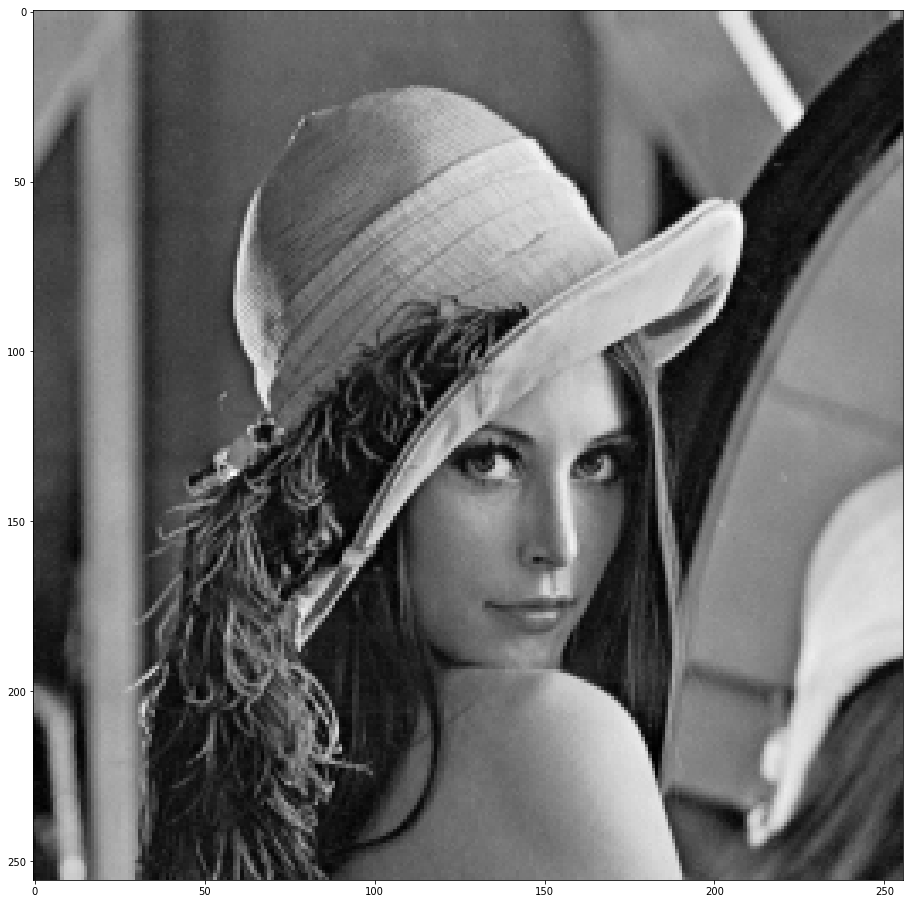

In [464]:
plt.figure("LENA", figsize=(40,16))
plt.imshow(fftpack.idctn(a), cmap="gray")
#plt.imshow(imagem, cmap="gray")

# VOLTA

In [395]:
# Aplicando IDCT Verticalmente nas linhas
imagemIDCT = np.zeros(imagem.shape)
for i, linha in enumerate(ImagemDCT_Trans.T):
    #print(i)
    #ImagemDCT[i] = idct1D(linha)
    imagemIDCT[i] = fftpack.idct(linha)

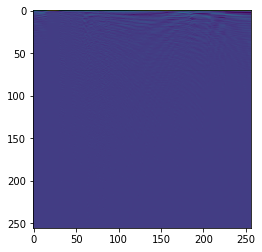

In [396]:
plt.imshow(imagemIDCT)

In [397]:
imagemIDCT_Trans = imagemIDCT.T

In [398]:
# Aplicando DCT Verticalmente nas Colunas
for i, linha in enumerate(imagemIDCT_Trans):
    #print(i)
    #ImagemDCT_Trans[i] = idct1D(linha)
    imagemIDCT_Trans[i] = fftpack.idct(linha)

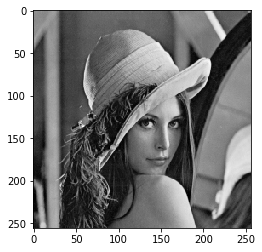

In [400]:
plt.imshow(imagemIDCT_Trans.T, cmap="gray")